In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib, sys, bs4
import pandas as pd
from collections import OrderedDict
from operator import itemgetter
from textblob import TextBlob
import requests
import justext
import operator
import os
import spacy
from multiprocessing import Pool
import lxml.html
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
import sys
from pyquery import PyQuery as pq
from urlparse import urlparse
import httplib, sys
import gensim
from gensim import corpora, models
import os
import pandas as pd
import numpy as np
import sys
#sys.path.append('/usr/local/lib/python2.7/dist-packages')
from bs4 import BeautifulSoup   
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import sys
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup   
import cPickle
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV	

In [20]:
dt=pd.read_csv("C:\\Users\\badeepak\Documents\Research\Product Rel\\URLlevel\\trainingdata_urlpc.csv",sep=",")
#dt=pd.read_csv("C:\\Users\\badeepak\Documents\Research\Product Rel\\URLlevel\\url_features_1500_PC.csv",sep="\t")

In [21]:
#dt['max_kscore']
#dt['range_top3_kscore']
kscore=[];
rangee=[];
for indx,row in dt.iterrows():
    try:
        zz= [float(i.strip()) for i in row['top_3_keyword_score'].split(',')]
    except:
        zz=[-1,-1,-1]       
    kscore.append(zz[0])
    rangee.append(zz[0] -zz[len(zz)-1])

In [22]:
dt['max_kscore'] = kscore
dt['range_top3_kscore'] = rangee

In [23]:
dt.columns

Index([u'documentId', u'title', u'p_cnt', u'az_link_cnt', u'other_link_cnt',
       u'comments_cnt', u'h1_cnt', u'h2_cnt', u'h3_cnt', u'h4_cnt',
       u'h3_cnt.1', u'h4_cnt.1', u'word_count_paragraphs',
       u'avg_word_count_paragraph', u'max_depth_dom', u'has_comments',
       u'protocol', u'sitename', u'top_levl_domain', u'domain', u'subdomain',
       u'ishomepage', u'no_url_params', u'no_url_levels', u'url_length',
       u'unique_candidate_keywords', u'kw_cnt_paragraphs', u'kw_cnt_title',
       u'kw_cnt_links', u'kw_cnt_az_links', u'kw_cnt_h1', u'kw_cnt_h2',
       u'kw_cnt_h3', u'kw_cnt_h4', u'kw_cnt_h5', u'kw_cnt_h6', u'max_kw_freq',
       u'mean_ngram_len', u'top_keyword', u'top_ASIN', u'top_GL',
       u'unique_keywords_cnt', u'asin_cnt', u'gl_cnt', u'top_3_keyword',
       u'top_3_asin', u'top_3_gl', u'top_3_keyword_score', u'top_3_asin_score',
       u'top_3_gl_score', u'is_topk_in_title', u'unique_keywords',
       u'top_kw_termfreq', u'top_kw_minlinenum', u'aksis_matc

In [24]:
dt.columns.values[10] = 'h5_cnt'
dt.columns.values[11] = 'h6_cnt'

In [25]:
dt['isHttp']=[1 if i == 'http' else 0 for i in dt['protocol']]

In [8]:
one_hot = pd.get_dummies(dt['top_GL']);
dt_extended=dt.drop('top_GL',axis=1)
dt_extended=dt_extended.join(one_hot)

In [8]:
dt_extended.columns

Index([u'documentId', u'title', u'p_cnt', u'az_link_cnt', u'other_link_cnt',
       u'comments_cnt', u'h1_cnt', u'h2_cnt', u'h3_cnt', u'h4_cnt',
       ...
       u'gl_shoes', u'gl_software', u'gl_sports', u'gl_sports_memorabilia',
       u'gl_tools', u'gl_toy', u'gl_video_games', u'gl_watch', u'gl_wireless',
       u'null'],
      dtype='object', length=115)

In [26]:
dt['best'] = [1 if 'best' in str(i).split(' ') else 0 for i in dt['title'] ]
dt['top'] = [1 if 'top' in str(i).split(' ') else 0 for i in dt['title'] ]
dt['review'] = [1 if 'review' in str(i).split(' ') else 0 for i in dt['title'] ]
dt_extended['best'] = [1 if 'best' in str(i).split(' ') else 0 for i in dt_extended['title'] ]
dt_extended['top'] = [1 if 'top' in str(i).split(' ') else 0 for i in dt_extended['title'] ]
dt_extended['review'] = [1 if 'review' in str(i).split(' ') else 0 for i in dt_extended['title'] ]

NameError: name 'dt_extended' is not defined

In [27]:
dt['ishomepage'] = [1 if i == 'Yes' else 0 for i in dt['ishomepage']]
dt_extended['ishomepage'] = [1 if i == 'Yes' else 0 for i in dt_extended['ishomepage']]

NameError: name 'dt_extended' is not defined

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.grid_search import GridSearchCV

In [29]:
dt_n = dt[(pd.isnull(dt.IsProd) == False) & (pd.isnull(dt.title) == False) & ( dt.top_GL != 'null')]

In [105]:
dt_n = dt_n[['p_cnt', 'az_link_cnt', 'other_link_cnt',
       'comments_cnt', 'h1_cnt', 'h2_cnt', 'h3_cnt', 'h4_cnt', 'h5_cnt',
       'h6_cnt', 'word_count_paragraphs', 'avg_word_count_paragraph',
       'max_depth_dom', 'has_comments','ishomepage',
       'no_url_params', 'no_url_levels', 'url_length',
       'unique_candidate_keywords', 'kw_cnt_paragraphs', 'kw_cnt_title',
       'kw_cnt_links', 'kw_cnt_az_links', 'kw_cnt_h1', 'kw_cnt_h2',
       'kw_cnt_h3', 'kw_cnt_h4', 'kw_cnt_h5', 'kw_cnt_h6', 'max_kw_freq',
       'mean_ngram_len', 'unique_keywords_cnt', 'asin_cnt', 'gl_cnt',  'is_topk_in_title', 'unique_keywords',
       'top_kw_termfreq', 'top_kw_minlinenum', 'aksis_match_rate',
       'max_kscore', 'range_top3_kscore', 'isHttp', 'best',
       'top', 'review','IsProd']]

In [15]:
train, test = train_test_split(dt_n, test_size = 0.2)
train_Y = train['IsProd']
train_X = train.drop('IsProd',axis=1)
test_Y = test['IsProd']
test_X = test.drop('IsProd',axis=1)
train_Y = [1 if i == 'Yes' else 0 for i in train_Y]
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400)
clf.fit(train_X, train_Y)
test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
#test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print accuracy_score(test_Y,pred)

0.758241758242


In [16]:
import operator;
f=train_X.columns
i=clf.feature_importances_
f_i=dict()
for j in range(0,len(f)):
    f_i[f[j]]=i[j]
sorted(f_i.items(),key=operator.itemgetter(1),reverse=True)    

[('max_kscore', 0.06839346934626335),
 ('mean_ngram_len', 0.058531712743008175),
 ('url_length', 0.044529531117940745),
 ('unique_candidate_keywords', 0.040729546426814742),
 ('unique_keywords_cnt', 0.040252525733834463),
 ('max_depth_dom', 0.039508464761676347),
 ('unique_keywords', 0.039190755971203146),
 ('kw_cnt_title', 0.037921697535996904),
 ('kw_cnt_links', 0.037759515367897047),
 ('other_link_cnt', 0.034176325896221924),
 ('kw_cnt_h2', 0.033327288817812085),
 ('aksis_match_rate', 0.032673487065784275),
 ('range_top3_kscore', 0.030106275790676821),
 ('kw_cnt_h1', 0.029375276458190533),
 ('kw_cnt_h3', 0.027878886092859517),
 ('max_kw_freq', 0.027380239104793879),
 ('word_count_paragraphs', 0.027345970557919288),
 ('avg_word_count_paragraph', 0.027202755631150547),
 ('gl_cnt', 0.026448486574539971),
 ('p_cnt', 0.026409309022287931),
 ('h2_cnt', 0.026286134271261787),
 ('kw_cnt_paragraphs', 0.025793717735705823),
 ('h3_cnt', 0.022323930605363286),
 ('az_link_cnt', 0.021622763286716

In [18]:
#lets try logistic regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(train_X, train_Y)
#test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
#test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
pred = logistic.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print accuracy_score(test_Y,pred)
pred=logistic.predict_proba(test_X)[:,1]
print sklearn.metrics.roc_auc_score(test_Y, pred, average='macro', sample_weight=None)

0.774725274725
0.777478517378


In [19]:
#precision-recall
import sklearn
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report
from sklearn.metrics import precision_recall_curve
pred = clf.predict(test_X)
print sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

0.719298245614
0.776
0.594202898551
0.858407079646


In [20]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])

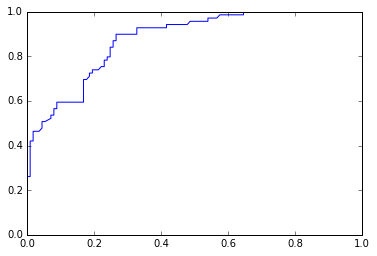

In [21]:
plt.plot(fpr,tpr)

In [22]:
auc(fpr,tpr)

0.87681159420289856

In [23]:
#precision-recall
import sklearn
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report
from sklearn.metrics import precision_recall_curve
pred = logistic.predict(test_X)
print sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

0.733333333333
0.795081967213
0.63768115942
0.858407079646


0.777478517378


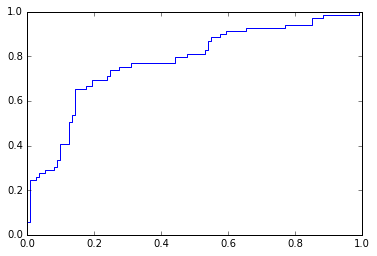

In [24]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, logistic.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print auc(fpr,tpr)

In [438]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=500,max_depth=10)
clf.fit(train_X, train_Y)
#test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
#test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print accuracy_score(test_Y,pred)

0.747252747253


In [305]:
#goes to /home/badeepak
import pickle
with open('test_train_data', 'wb') as handle:
    pickle.dump([train_X,train_Y,test_Y,test_X], handle, protocol=pickle.HIGHEST_PROTOCOL)

#with open('filename.pickle', 'rb') as handle:
#    b = pickle.load(handle)

0.829103535354


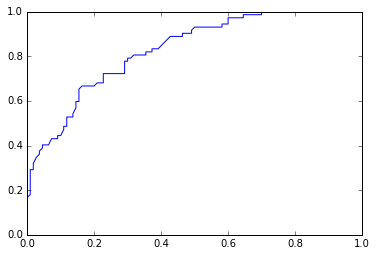

In [357]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print auc(fpr,tpr)

In [327]:
len(train_X.columns)

45

In [366]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400,max_depth=10)
clf.fit(train_X, train_Y)
#test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
#test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print accuracy_score(test_Y,pred)

0.752747252747


0.813131313131


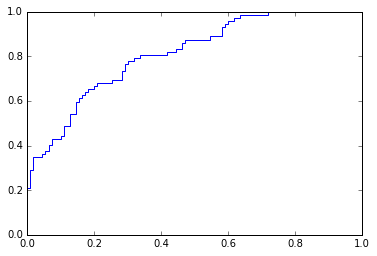

In [367]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print auc(fpr,tpr)

In [368]:
train_X.columns

Index([u'p_cnt', u'az_link_cnt', u'other_link_cnt', u'comments_cnt', u'h1_cnt',
       u'h2_cnt', u'h3_cnt', u'h4_cnt', u'h5_cnt', u'h6_cnt',
       u'word_count_paragraphs', u'avg_word_count_paragraph', u'max_depth_dom',
       u'has_comments', u'ishomepage', u'no_url_params', u'no_url_levels',
       u'url_length', u'unique_candidate_keywords', u'kw_cnt_paragraphs',
       u'kw_cnt_title', u'kw_cnt_links', u'kw_cnt_az_links', u'kw_cnt_h1',
       u'kw_cnt_h2', u'kw_cnt_h3', u'kw_cnt_h4', u'kw_cnt_h5', u'kw_cnt_h6',
       u'max_kw_freq', u'mean_ngram_len', u'unique_keywords_cnt', u'asin_cnt',
       u'gl_cnt', u'is_topk_in_title', u'unique_keywords', u'top_kw_termfreq',
       u'top_kw_minlinenum', u'aksis_match_rate', u'max_kscore',
       u'range_top3_kscore', u'isHttp', u'best', u'top', u'review'],
      dtype='object')

In [381]:
# reduce training dataset 
dt_n1 = dt_n[['p_cnt', 'az_link_cnt', 
       'comments_cnt', 'h1_cnt', 'h2_cnt', 'h3_cnt', 'h4_cnt', 'h5_cnt',
       'h6_cnt', 'word_count_paragraphs', 'avg_word_count_paragraph',
       'max_depth_dom', 'unique_candidate_keywords', 'kw_cnt_title',
       'kw_cnt_links', 'kw_cnt_az_links', 'kw_cnt_h1', 'kw_cnt_h2',
       'kw_cnt_h3', 'kw_cnt_h4', 'kw_cnt_h5', 'kw_cnt_h6', 'max_kw_freq',
       'mean_ngram_len', 'unique_keywords_cnt', 'asin_cnt', 'gl_cnt',  'is_topk_in_title', 'unique_keywords',
       'top_kw_termfreq', 'top_kw_minlinenum', 'aksis_match_rate',
       'max_kscore', 'range_top3_kscore', 'isHttp', 'best',
       'top', 'review','IsProd']]
train, test = train_test_split(dt_n1, test_size = 0.2)
train_Y1 = train['IsProd']
train_X1 = train.drop('IsProd',axis=1)
test_Y1 = test['IsProd']
test_X1 = test.drop('IsProd',axis=1)
train_Y1 = [1 if i == 'Yes' else 0 for i in train_Y1]
test_Y1 = [1 if i == 'Yes' else 0 for i in test_Y1]

In [26]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=500,max_depth=10)
clf.fit(train_X1, train_Y1)
pred = clf.predict(test_X1)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y1]
print accuracy_score(test_Y1,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y1, clf.predict_proba(test_X1)[:,1])
plt.plot(fpr,tpr)
print auc(fpr,tpr)

NameError: name 'train_X1' is not defined

In [400]:
from sklearn.feature_selection import RFE
model=LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(train_X,train_Y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False]
[25 11 42 30 15 26 22 39 13 33 37 28 43  4  5 12  9 17 27 34 35 31 36 16 23
 38 32 41 10 19  6 24 14 21 40 29 18 20  2  1  3  7 44  8 45]


In [401]:
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), train_X.columns))

[(1.0, 'max_kscore'), (2.0, 'aksis_match_rate'), (3.0, 'range_top3_kscore'), (4.0, 'has_comments'), (5.0, 'ishomepage'), (6.0, 'mean_ngram_len'), (7.0, 'isHttp'), (8.0, 'top'), (9.0, 'no_url_levels'), (10.0, 'kw_cnt_h6'), (11.0, 'az_link_cnt'), (12.0, 'no_url_params'), (13.0, 'h5_cnt'), (14.0, 'asin_cnt'), (15.0, 'h1_cnt'), (16.0, 'kw_cnt_h1'), (17.0, 'url_length'), (18.0, 'top_kw_termfreq'), (19.0, 'max_kw_freq'), (20.0, 'top_kw_minlinenum'), (21.0, 'gl_cnt'), (22.0, 'h3_cnt'), (23.0, 'kw_cnt_h2'), (24.0, 'unique_keywords_cnt'), (25.0, 'p_cnt'), (26.0, 'h2_cnt'), (27.0, 'unique_candidate_keywords'), (28.0, 'avg_word_count_paragraph'), (29.0, 'unique_keywords'), (30.0, 'comments_cnt'), (31.0, 'kw_cnt_links'), (32.0, 'kw_cnt_h4'), (33.0, 'h6_cnt'), (34.0, 'kw_cnt_paragraphs'), (35.0, 'kw_cnt_title'), (36.0, 'kw_cnt_az_links'), (37.0, 'word_count_paragraphs'), (38.0, 'kw_cnt_h3'), (39.0, 'h4_cnt'), (40.0, 'is_topk_in_title'), (41.0, 'kw_cnt_h5'), (42.0, 'other_link_cnt'), (43.0, 'max_dep

In [414]:
#cross validation
model = RandomForestClassifier(random_state=30)
#param_grid = { "n_estimators" : [10,50,100,400],
#           "criterion"         : ["gini","entropy"],
#           "max_features"      : [5,10,15,20,30],
#           "max_depth"         : [5,10,20],
#           "min_samples_split" : [2,10,20] ,
#           "bootstrap": [True,False]}
param_grid = { "n_estimators" : [300,400,500],
           #"criterion"         : ["gini","entropy"],
           #"max_features"      : [0,130],
           "max_depth"         : [10,20,25],
           #"min_samples_split" : [2,10,20] ,
           #"bootstrap": [True,False]
             }
#X=dt_n.drop('',axis=1)
X=dt_n.drop('IsProd',axis=1)
y=dt_n['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(clf, param_grid, n_jobs=1, cv=5,scoring='precision')
grid_search.fit(X, y)
print grid_search.best_params_

{'n_estimators': 500, 'max_depth': 10}


In [421]:
grid_search.estimator


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [426]:
import sklearn
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report
from sklearn.metrics import precision_recall_curve
pred = grid_search.predict(train_X)
print sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

ValueError: Found arrays with inconsistent numbers of samples: [182 724]

In [1]:
#xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb

In [25]:
print sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print sklearn.metrics.precision_score(test_Y,pred,pos_label=1)

0.733333333333


<h3> Vanilla - Comparing methods - RF, Logistic, GBDT, SVM </h3>

Accuracy  0.802197802198
AUC : 0.886494805694
Precision of yes : 0.779661016949
Precision of no : 0.813008130081
Recall of yes : 0.666666666667
Recall of no : 0.884955752212


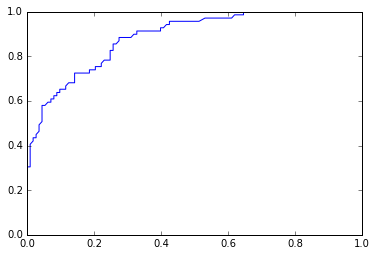

In [46]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400,max_depth=20,random_state=3)
clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

Accuracy  0.774725274725
AUC : 0.777478517378
Precision of yes : 0.733333333333
Precision of no : 0.795081967213
Recall of yes : 0.63768115942
Recall of no : 0.858407079646


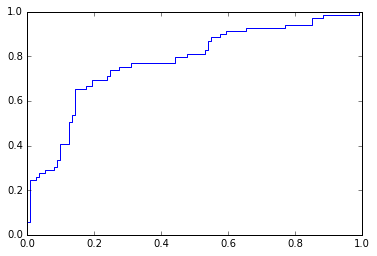

In [47]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(train_X, train_Y)
pred = logistic.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, logistic.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

Accuracy  0.769230769231
AUC : 0.850968321149
Precision of yes : 0.707692307692
Precision of no : 0.803418803419
Recall of yes : 0.666666666667
Recall of no : 0.83185840708


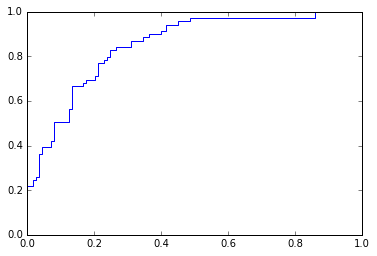

In [72]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=10, n_estimators=50, learning_rate=0.05)
train_X = train_X.apply(pd.to_numeric)
test_X = test_X.apply(pd.to_numeric)
gbm.fit(train_X, train_Y)
pred = gbm.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, gbm.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

Accuracy  0.736263736264
AUC : 0.766705143004
Precision of yes : 0.677966101695
Precision of no : 0.764227642276
Recall of yes : 0.579710144928
Recall of no : 0.83185840708


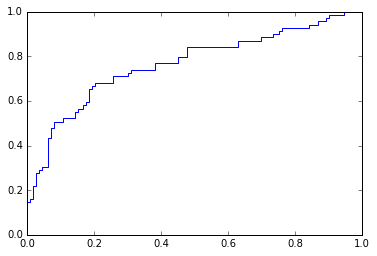

In [76]:
from sklearn import svm
supvm = svm.SVC(kernel='linear',probability = True, random_state = 20, C = 1.0)
supvm.fit(train_X, train_Y)
pred = supvm.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, supvm.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

<h3>Lets try using just word2vec feature</h3>

In [16]:
#import google word vectors
from gensim.models import Word2Vec
model = Word2Vec.load_word2vec_format("C:\\Users\\badeepak\\GoogleNews-vectors-negative300.bin", binary=True)
dog = model['dog']

In [15]:
import os
os.getcwd()

'C:\\Users\\badeepak'

In [17]:
#define preprocess function
def process(raw_review ):
    #p1= re.compile('^[0-9]*[0-9]$');
    #p2= re.compile('sdl*');
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual wofurniturerds
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    #stops=[]
    # 
    # 5. Remove stop words
    #meaningful_words = [w for w in words if not w in stops and not p2.match(w) and not p1.match(w)]   
    meaningful_words = [str(lmtzr.lemmatize(w)) for w in words if not w in stops ]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #tmp=[]
    #for j in meaningful_words:
    #    res = ""        
    #    res = re.sub("[a-zA-Z$-]+[0-9]+","[ALPHANUM]",j)
    #    res = re.sub("201[0-9]","[YEAR]",res)
    #    res = re.sub("[0-9]+","[NUM]",res)
    #    tmp.append(res)
    #return(" ".join(tmp))
    return meaningful_words

In [67]:
dt_vectors = []
dt_w2v_vocab = []
dummy = [0.00] * 300
for i in dt['title'].fillna(''):
    doc = [word for word in process(i) if word in model.vocab]
    if len(doc) == 0:
        dt_vectors.append(dummy)
        dt_w2v_vocab.append([])
    else:
        dt_vectors.append(np.mean(model[doc],axis=0))         
        dt_w2v_vocab.append([word for word in process(i) if word in model.vocab])
#doc = [word for word in doc if word in word2vec_model.vocab]
#np.mean(model[['dog']],axis=0)

In [68]:
colname = ["v"+str(i) for i in range(0,300)]
dt_vec = pd.DataFrame(dt_vectors,columns = colname)

In [69]:
dt_vec1 = pd.DataFrame([str(i) for i in dt_w2v_vocab],columns = ['w2v_vocab_match'])

In [70]:
dt_v = dt.join(dt_vec)

In [71]:
dt_v = dt_v.join(dt_vec1)

In [72]:
dt_v1 = dt_v[(pd.isnull(dt_v.IsProd) == False) & (pd.isnull(dt_v.title) == False) & ( dt_v.top_GL != 'null') & (dt_v['v0'] != 0.0) & (dt_v['v1'] != 0.0) & (dt_v['v2'] != 0.0)]

In [21]:
colname.append('IsProd')
dt_v1 = dt_v1[colname]

In [182]:
train, test = train_test_split(dt_v1, test_size = 0.2)
train_Y = train['IsProd']
train_X = train.drop('IsProd',axis=1)
test_Y = test['IsProd']
test_X = test.drop('IsProd',axis=1)
train_Y = [1 if i == 'Yes' else 0 for i in train_Y]
test_Y = [1 if i == 'Yes' else 0 for i in test_Y]

<h3>Only 23 out of 906 have no vectors averaged. so good !>/h3>

Accuracy  0.762711864407
AUC : 0.829443690638
Precision of yes : 0.765957446809
Precision of no : 0.761538461538
Recall of yes : 0.537313432836
Recall of no : 0.9


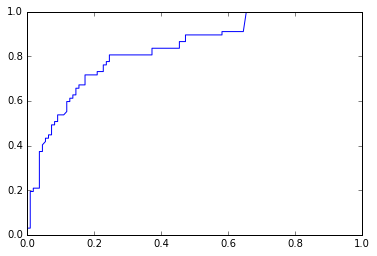

In [200]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400,max_depth=20,criterion='entropy',max_features = 40,random_state=30)
clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

In [199]:
#cross validation
model = RandomForestClassifier(random_state=30)
#param_grid = { "n_estimators" : [10,50,100,400],
#           "criterion"         : ["gini","entropy"],
#           "max_features"      : [5,10,15,20,30],
#           "max_depth"         : [5,10,20],
#           "min_samples_split" : [2,10,20] ,
#           "bootstrap": [True,False]}
param_grid = { "n_estimators" : [50,100,200,400,500],
               "criterion"         : ["gini","entropy"],
               "max_features"      : [10,30,40],
               "max_depth"         : [10,20,25],
           #"min_samples_split" : [2,10,20] ,
           #"bootstrap": [True,False]
             }
#X=dt_n.drop('',axis=1)
X=dt_v1.drop('IsProd',axis=1)
y=dt_v1['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(clf, param_grid, n_jobs=1, cv=5,scoring='accuracy')
grid_search.fit(X, y)
print grid_search.best_params_

{'max_features': 40, 'n_estimators': 400, 'criterion': 'entropy', 'max_depth': 20}


<h4>
for precision 
{'max_features': 30, 'n_estimators': 500, 'criterion': 'entropy', 'max_depth': 20} resutls in a precision(yes) of 80%
</h4>

<h3> Trying to add top GL in the feature list (along with traditional features) <br> 
for the same training and test dataset, adding GL only reduces accuracy / no value add </h3>

In [21]:
#lets try including top GL in random forest model (run upto 14 (i))
isGLBook = ['gl_book','gl_automotive','gl_digital_video_download','gl_digital_ebook_purchase']
dt_n['isBook'] = [1 if i in isGLBook else 0 for i in dt_n['top_GL']]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [103]:
dt_n = dt_n[['p_cnt', 'az_link_cnt', 'other_link_cnt',
       'comments_cnt', 'h1_cnt', 'h2_cnt', 'h3_cnt', 'h4_cnt', 'h5_cnt',
       'h6_cnt', 'word_count_paragraphs', 'avg_word_count_paragraph',
       'max_depth_dom', 'has_comments','ishomepage',
       'no_url_params', 'no_url_levels', 'url_length',
       'unique_candidate_keywords', 'kw_cnt_paragraphs', 'kw_cnt_title',
       'kw_cnt_links', 'kw_cnt_az_links', 'kw_cnt_h1', 'kw_cnt_h2',
       'kw_cnt_h3', 'kw_cnt_h4', 'kw_cnt_h5', 'kw_cnt_h6', 'max_kw_freq',
       'mean_ngram_len', 'unique_keywords_cnt', 'asin_cnt', 'gl_cnt',  'is_topk_in_title', 'unique_keywords',
       'top_kw_termfreq', 'top_kw_minlinenum', 'aksis_match_rate',
       'max_kscore', 'range_top3_kscore', 'isHttp', 'best',
       'top', 'review','IsProd','isBook']]

KeyError: "['isBook'] not in index"

In [112]:
train, test = train_test_split(dt_n, test_size = 0.2)
train_Y = train['IsProd']
train_X = train.drop('IsProd',axis=1)
test_Y = test['IsProd']
test_X = test.drop('IsProd',axis=1)
train_Y = [1 if i == 'Yes' else 0 for i in train_Y]
test_Y = [1 if i == 'Yes' else 0 for i in test_Y]

In [113]:
del train_X['isBook']
del test_X['isBook']

KeyError: 'isBook'

Accuracy  0.785714285714
AUC : 0.860395408163
Precision of yes : 0.754098360656
Precision of no : 0.801652892562
Recall of yes : 0.657142857143
Recall of no : 0.866071428571


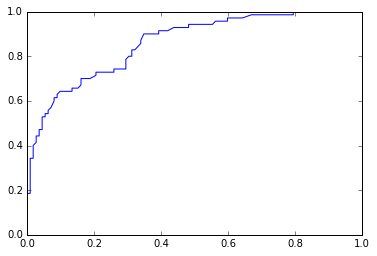

In [101]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400,max_depth=20,random_state=3)
clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

In [99]:
del dt_n['isBook']

KeyError: 'isBook'

In [39]:
#cross validation (get best params for traditional features)
model = RandomForestClassifier(random_state=30)
#param_grid = { "n_estimators" : [10,50,100,400,500],
#           "criterion"         : ["gini","entropy"],
#           "max_features"      : [5,10,15,20,30],
#           "max_depth"         : [5,10,20],
#           "min_samples_split" : [2,10,20] ,
#           "bootstrap": [True,False]}
param_grid = { "n_estimators" : [50,100,200,400,500],
               "criterion"         : ["gini","entropy"],
               "max_features"      : [10,30,40],
               "max_depth"         : [10,20,25],
           #"min_samples_split" : [2,10,20] ,
           #"bootstrap": [True,False]
             }
#X=dt_n.drop('',axis=1)
X=dt_n.drop('IsProd',axis=1)
y=dt_n['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(clf, param_grid, n_jobs=1, cv=5,scoring='accuracy')
grid_search.fit(X, y)
print grid_search.best_params_

{'max_features': 10, 'n_estimators': 500, 'criterion': 'gini', 'max_depth': 10}


In [46]:
grid_search.grid_scores_

[mean: 0.74614, std: 0.02153, params: {'max_features': 10, 'n_estimators': 50, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.74614, std: 0.02172, params: {'max_features': 10, 'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.75607, std: 0.02451, params: {'max_features': 10, 'n_estimators': 200, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.75717, std: 0.02449, params: {'max_features': 10, 'n_estimators': 400, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.76269, std: 0.02217, params: {'max_features': 10, 'n_estimators': 500, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.73731, std: 0.02632, params: {'max_features': 30, 'n_estimators': 50, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.73400, std: 0.02561, params: {'max_features': 30, 'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.74724, std: 0.00381, params: {'max_features': 30, 'n_estimators': 200, 'criterion': 'gini', 'max_depth': 10},
 mean: 0.74503, std: 0.01024, params: {'max_featur

<h3> Using the best params from CV </h3>

Accuracy  0.769230769231
AUC : 0.833870967742
Precision of yes : 0.666666666667
Precision of no : 0.819672131148
Recall of yes : 0.645161290323
Recall of no : 0.833333333333


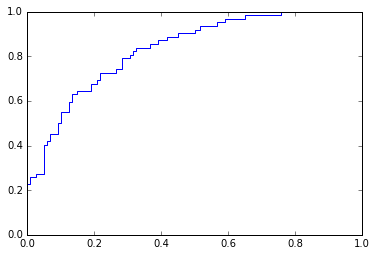

In [114]:
clf = RandomForestClassifier(n_jobs=-1,criterion = 'gini', n_estimators=500,max_depth=10,max_features = 10,random_state=30)
clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

In [57]:
print sklearn.metrics.log_loss(test_Y, clf.predict_proba(test_X)[:,1])

0.404945489812


In [115]:
import operator;
f=train_X.columns
i=clf.feature_importances_
f_i=dict()
for j in range(0,len(f)):
    f_i[f[j]]=i[j]
sorted(f_i.items(),key=operator.itemgetter(1),reverse=True)

[('max_kscore', 0.087007227669661305),
 ('mean_ngram_len', 0.07258761679547375),
 ('unique_candidate_keywords', 0.049895705018718553),
 ('url_length', 0.047057591057583385),
 ('kw_cnt_links', 0.043239285402011877),
 ('kw_cnt_h2', 0.043106053121292127),
 ('max_depth_dom', 0.034856638198824702),
 ('unique_keywords_cnt', 0.034647293629998577),
 ('kw_cnt_title', 0.033672735894082026),
 ('aksis_match_rate', 0.033579076280374195),
 ('unique_keywords', 0.033321213727113191),
 ('kw_cnt_h1', 0.032064221680985869),
 ('other_link_cnt', 0.031275832509338922),
 ('h2_cnt', 0.029971032908355177),
 ('avg_word_count_paragraph', 0.028913948761167329),
 ('range_top3_kscore', 0.027988055485534052),
 ('max_kw_freq', 0.024890877271352235),
 ('word_count_paragraphs', 0.023501892026529015),
 ('kw_cnt_h3', 0.023120688075072952),
 ('gl_cnt', 0.023044235645642296),
 ('no_url_levels', 0.02249418870602821),
 ('asin_cnt', 0.021803379695673954),
 ('kw_cnt_paragraphs', 0.0211873279958141),
 ('h3_cnt', 0.0202060742047

<h3> Trying Traditional + BOW features </h3>

In [85]:
colname = ["v"+str(i) for i in range(0,300)]
for i in ['p_cnt', 'az_link_cnt', 'other_link_cnt',
       'comments_cnt', 'h1_cnt', 'h2_cnt', 'h3_cnt', 'h4_cnt', 'h5_cnt',
       'h6_cnt', 'word_count_paragraphs', 'avg_word_count_paragraph',
       'max_depth_dom', 'has_comments','ishomepage',
       'no_url_params', 'no_url_levels', 'url_length',
       'unique_candidate_keywords', 'kw_cnt_paragraphs', 'kw_cnt_title',
       'kw_cnt_links', 'kw_cnt_az_links', 'kw_cnt_h1', 'kw_cnt_h2',
       'kw_cnt_h3', 'kw_cnt_h4', 'kw_cnt_h5', 'kw_cnt_h6', 'max_kw_freq',
       'mean_ngram_len', 'unique_keywords_cnt', 'asin_cnt', 'gl_cnt',  'is_topk_in_title', 'unique_keywords',
       'top_kw_termfreq', 'top_kw_minlinenum', 'aksis_match_rate',
       'max_kscore', 'range_top3_kscore', 'isHttp', 'best',
       'top', 'review','IsProd']:
    colname.append(i)

In [87]:
dt_v1 = dt_v1[colname]

In [89]:
#cross validation
model = RandomForestClassifier(random_state=30)
#param_grid = { "n_estimators" : [10,50,100,400],
#           "criterion"         : ["gini","entropy"],
#           "max_features"      : [5,10,15,20,30],
#           "max_depth"         : [5,10,20],
#           "min_samples_split" : [2,10,20] ,
#           "bootstrap": [True,False]}
param_grid = { "n_estimators" : [50,100,200,400,500],
               "criterion"         : ["gini","entropy"],
               "max_features"      : [10,30,40],
               "max_depth"         : [10,20,25],
           #"min_samples_split" : [2,10,20] ,
           #"bootstrap": [True,False]
             }
#X=dt_n.drop('',axis=1)
X=dt_v1.drop('IsProd',axis=1)
y=dt_v1['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(clf, param_grid, n_jobs=1, cv=5,scoring='accuracy')
grid_search.fit(X, y)
print grid_search.best_params_

{'max_features': 30, 'n_estimators': 400, 'criterion': 'gini', 'max_depth': 20}


In [90]:
train, test = train_test_split(dt_v1, test_size = 0.2)
train_Y = train['IsProd']
train_X = train.drop('IsProd',axis=1)
test_Y = test['IsProd']
test_X = test.drop('IsProd',axis=1)
train_Y = [1 if i == 'Yes' else 0 for i in train_Y]
test_Y = [1 if i == 'Yes' else 0 for i in test_Y]

Accuracy  0.790960451977
AUC : 0.859686609687
Precision of yes : 0.734693877551
Precision of no : 0.8125
Recall of yes : 0.6
Recall of no : 0.888888888889


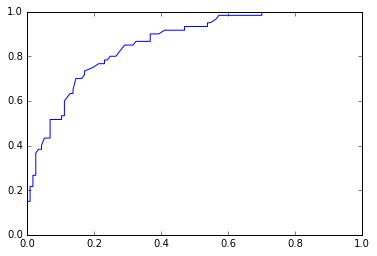

In [95]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400,criterion='gini',random_state=3)
clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

In [117]:
dt_v1.to_csv("all_features_url.csv")

In [25]:
train, test = train_test_split(dt_v1, test_size = 0.2,random_state =30)
train_Y = train['IsProd']
train_X = train.drop('IsProd',axis=1)
test_Y = test['IsProd']
test_X = test.drop('IsProd',axis=1)
train_Y = [1 if i == 'Yes' else 0 for i in train_Y]
test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
vector_traidtional_features = colname
traditional_features = ['p_cnt', 'az_link_cnt', 'other_link_cnt',
       'comments_cnt', 'h1_cnt', 'h2_cnt', 'h3_cnt', 'h4_cnt', 'h5_cnt',
       'h6_cnt', 'word_count_paragraphs', 'avg_word_count_paragraph',
       'max_depth_dom', 'has_comments','ishomepage',
       'no_url_params', 'no_url_levels', 'url_length',
       'unique_candidate_keywords', 'kw_cnt_paragraphs', 'kw_cnt_title',
       'kw_cnt_links', 'kw_cnt_az_links', 'kw_cnt_h1', 'kw_cnt_h2',
       'kw_cnt_h3', 'kw_cnt_h4', 'kw_cnt_h5', 'kw_cnt_h6', 'max_kw_freq',
       'mean_ngram_len', 'unique_keywords_cnt', 'asin_cnt', 'gl_cnt',  'is_topk_in_title', 'unique_keywords',
       'top_kw_termfreq', 'top_kw_minlinenum', 'aksis_match_rate',
       'max_kscore', 'range_top3_kscore', 'isHttp', 'best',
       'top', 'review']
vector_features = ["v"+str(i) for i in range(0,300)]

In [130]:
# lets redo CV for both methods

In [146]:
#cross validation
model = RandomForestClassifier(random_state=11)
param_grid = { "n_estimators" : [50,100,200,400,500],
               "criterion"         : ["gini","entropy"],
               "max_features"      : [10,30,40],
               "max_depth"         : [10,20,25],
               #"min_samples_split" : [2,10,20] ,
               "bootstrap": [True,False]
             }

X=dt_v1[traditional_features]
y=dt_v1['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(clf, param_grid, n_jobs=1, cv=5,scoring='accuracy')
grid_search.fit(X, y)
print grid_search.best_params_

{'max_features': 10, 'n_estimators': 500, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 10}


In [151]:
#grid_search_traditional = grid_search


In [157]:
#running with best params
model = RandomForestClassifier(random_state=98)
param_grid = { "n_estimators" : [500],
               "criterion"         : ["gini"],
               "max_features"      : [10],
               "max_depth"         : [10],
               #"min_samples_split" : [2,10,20] ,
               "bootstrap": [True]
             }
X=dt_v1[traditional_features]
y=dt_v1['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(clf, param_grid, n_jobs=1, cv=5,scoring='accuracy')
grid_search.fit(X, y)
print grid_search.best_params_

{'max_features': 10, 'n_estimators': 500, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 10}


In [166]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=500,criterion='gini',max_features=10, bootstrap =True, max_depth =10,random_state=3)
clf.fit(X,y)
#pred = clf.predict(test_X)
#predicted=[1 if i=='Yes' else 0 for i in pred]
#actual=[1 if i=='Yes' else 0 for i in test_Y]
#print "Accuracy ",accuracy_score(test_Y,pred)
#fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
#plt.plot(fpr,tpr)
#print "AUC :",auc(fpr,tpr)
#print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
#print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
#print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
#print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)
import operator;
f=X.columns
i=clf.feature_importances_
f_i=dict()
for j in range(0,len(f)):
    f_i[f[j]]=i[j]
print sorted(f_i.items(),key=operator.itemgetter(1),reverse=True)


[('max_kscore', 0.080615896615292712), ('mean_ngram_len', 0.067136956810552123), ('url_length', 0.052744342914334837), ('max_depth_dom', 0.045777613701118547), ('kw_cnt_links', 0.040845222403633093), ('kw_cnt_h2', 0.038434764463423782), ('unique_candidate_keywords', 0.038005821008803738), ('kw_cnt_title', 0.036237515292077561), ('unique_keywords_cnt', 0.036128684647770276), ('unique_keywords', 0.033254215743626761), ('aksis_match_rate', 0.031327788204593365), ('range_top3_kscore', 0.030212436433510292), ('kw_cnt_h1', 0.029796566729255416), ('other_link_cnt', 0.029355453366179427), ('h2_cnt', 0.029050128129841545), ('avg_word_count_paragraph', 0.028185854401236145), ('max_kw_freq', 0.026882196388174479), ('az_link_cnt', 0.024970332039567129), ('asin_cnt', 0.02444983620887416), ('kw_cnt_h3', 0.023981699095892987), ('kw_cnt_paragraphs', 0.023064752284217099), ('gl_cnt', 0.022490907647936161), ('p_cnt', 0.021642598114344946), ('word_count_paragraphs', 0.021017015096213017), ('no_url_levels

In [169]:
from sklearn.cross_validation import cross_val_score
clf = RandomForestClassifier(n_jobs=-1,n_estimators=500,criterion='gini',max_features=10, bootstrap =True, max_depth =10,random_state=3)
scores = cross_val_score(clf, X, y, cv=10)
print np.mean(scores)

0.749283223557


In [176]:
np.std(scores)

0.042344185260532144

In [170]:
#cross validation
model = RandomForestClassifier(random_state=11)
param_grid = { "n_estimators" : [50,100,200,400,500],
               "criterion"         : ["gini","entropy"],
               "max_features"      : [10,30,40],
               "max_depth"         : [10,20,25],
               #"min_samples_split" : [2,10,20] ,
               "bootstrap": [True,False]
             }
X=dt_v1[vector_features]
y=dt_v1['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(clf, param_grid, n_jobs=1, cv=5,scoring='accuracy')
grid_search.fit(X, y)
print grid_search.best_params_

{'max_features': 40, 'n_estimators': 400, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 10}


In [177]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400,criterion='gini',max_features=40, bootstrap =False, max_depth =10,random_state=3)
clf.fit(X,y)
#pred = clf.predict(test_X)
#predicted=[1 if i=='Yes' else 0 for i in pred]
#actual=[1 if i=='Yes' else 0 for i in test_Y]
#print "Accuracy ",accuracy_score(test_Y,pred)
#fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
#plt.plot(fpr,tpr)
#print "AUC :",auc(fpr,tpr)
#print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
#print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
#print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
#print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)
import operator;
f=X.columns
i=clf.feature_importances_
f_i=dict()
for j in range(0,len(f)):
    f_i[f[j]]=i[j]
print sorted(f_i.items(),key=operator.itemgetter(1),reverse=True)

[('v75', 0.027338020378353464), ('v294', 0.02125452298809119), ('v252', 0.019784614093909629), ('v207', 0.017605427545616149), ('v223', 0.015772537879696791), ('v87', 0.013417472444710248), ('v90', 0.013139196603576346), ('v135', 0.011085945954798591), ('v70', 0.010493545949142889), ('v18', 0.010073230825302341), ('v200', 0.0095760061796736212), ('v74', 0.0093003385791595346), ('v295', 0.008315485448886311), ('v60', 0.0075903821212576694), ('v48', 0.0074508165215294462), ('v106', 0.0073080556456661568), ('v203', 0.007176243421670783), ('v158', 0.006805626259742229), ('v177', 0.0067330218888271252), ('v173', 0.0063964498809015412), ('v116', 0.0063063813583860229), ('v93', 0.0059981373580975912), ('v262', 0.0058108802823326026), ('v193', 0.0057234964838533877), ('v211', 0.0055579203370887172), ('v161', 0.0054331003449789583), ('v131', 0.0052710014365661981), ('v179', 0.0052124343819469352), ('v27', 0.0051883670473864777), ('v219', 0.004993752204189579), ('v197', 0.00480483297767472), ('v

In [178]:
from sklearn.cross_validation import cross_val_score
clf = RandomForestClassifier(n_jobs=-1,n_estimators=400,criterion='gini',max_features=40, bootstrap =False, max_depth =10,random_state=3)
scores = cross_val_score(clf, X, y, cv=5)
print np.mean(scores)

0.756256384065


In [179]:
print np.std(scores)

0.0187038080673


In [26]:
v_t_features = traditional_features
for i in vector_features:
    v_t_features.append(i)

In [188]:
#cross validation
model = RandomForestClassifier(random_state=11)
param_grid = { "n_estimators" : [100,200,600,700],
               "criterion"         : ["entropy"],
               "max_features"      : [20,40,50,80], #20
               "max_depth"         : [10,20],
               #"min_samples_split" : [2,10,20] ,
               "bootstrap": [True,False]
             }
X=dt_v1[v_t_features]
y=dt_v1['IsProd']
y = [1 if i == 'Yes' else 0 for i in y]       
grid_search = GridSearchCV(model, param_grid, n_jobs=1, cv=5,scoring='accuracy')
grid_search.fit(X, y)
print grid_search.best_params_

{'max_features': 50, 'n_estimators': 700, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 10}


In [195]:
from sklearn.cross_validation import cross_val_score
clf = RandomForestClassifier(n_jobs=-1,n_estimators=700,criterion='gini',max_features=50, bootstrap =False, max_depth =10,random_state=3)
scores = cross_val_score(clf, X, y, cv=5)
print np.mean(scores)

0.792517875383


In [196]:
np.std(scores)

0.022006420618315283

In [30]:
all_feat = dt_v1 = dt_v[(pd.isnull(dt_v.IsProd) == False) & (pd.isnull(dt_v.title) == False) & ( dt_v.top_GL != 'null') & (dt_v['v0'] != 0.0) & (dt_v['v1'] != 0.0) & (dt_v['v2'] != 0.0)]

In [46]:
#X1 = all_feat[v_t_features]
#y1 = all_feat['IsProd']
train, test = train_test_split(all_feat, test_size = 0.2,random_state = 666)
train_Y = train['IsProd']
#train_X = train.drop('IsProd',axis=1)
train_X = train[colname[0:299]]
test_Y = test['IsProd']
test_X = test[colname[0:299]]
train_Y = [1 if i == 'Yes' else 0 for i in train_Y]
test_Y = [1 if i == 'Yes' else 0 for i in test_Y]
clf = RandomForestClassifier(n_jobs=-1,n_estimators=200,criterion='entropy',max_features=20, bootstrap =True, max_depth =25,random_state=3)
clf.fit(train_X,train_Y)
pred = clf.predict(test_X)
predicted=[1 if i=='Yes' else 0 for i in pred]
actual=[1 if i=='Yes' else 0 for i in test_Y]
print "Accuracy ",accuracy_score(test_Y,pred)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr)
print "AUC :",auc(fpr,tpr)
print "Precision of yes :",sklearn.metrics.precision_score(test_Y,pred,pos_label=1)
print "Precision of no :",sklearn.metrics.precision_score(test_Y,pred,pos_label=0)
print "Recall of yes :",sklearn.metrics.recall_score(test_Y,pred,pos_label=1)
print "Recall of no :",sklearn.metrics.recall_score(test_Y,pred,pos_label=0)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [63]:
import operator;
f=train_X.columns
i=clf.feature_importances_
f_i=dict()
for j in range(0,len(f)):
    f_i[f[j]]=i[j]
z = sorted(f_i.items(),key=operator.itemgetter(1),reverse=True)
[i+":   "+str(j)+"" for (i,j) in z]

['v75:   0.0258357670623',
 'v294:   0.013220906681',
 'v207:   0.0130418281201',
 'v87:   0.0114998115307',
 'v252:   0.0112660880536',
 'v90:   0.0109662977838',
 'v106:   0.009107114454',
 'v295:   0.00901795452133',
 'v135:   0.00887469054396',
 'v223:   0.0079618072747',
 'v200:   0.00792286404388',
 'v161:   0.00684402623812',
 'v211:   0.00616270677471',
 'v18:   0.0060594921794',
 'v71:   0.00577126146724',
 'v40:   0.00567804731603',
 'v48:   0.00546288272962',
 'v70:   0.00534507642084',
 'v173:   0.00521788696694',
 'v257:   0.00516282529746',
 'v203:   0.00513632137032',
 'v166:   0.00504140231538',
 'v93:   0.00500873195441',
 'v141:   0.00487845434269',
 'v236:   0.00485300656468',
 'v89:   0.0048357004553',
 'v60:   0.00479497210117',
 'v177:   0.00474255984596',
 'v56:   0.00473384466226',
 'v226:   0.00470434856435',
 'v157:   0.00458981460388',
 'v178:   0.00456840989195',
 'v57:   0.0044356221939',
 'v58:   0.00442914740624',
 'v79:   0.00440558513715',
 'v163:   0.0

In [ ]:
anlz = test['title']
anlz['IsProd']=test['IsProd']
anlz['predicted']=clf.predict(test_X)[:,1]

In [81]:
test['title'][1:40]

404                           I side 47% with Mike Pence
667    ESPN: Donatas Motiejunas won't report to Rocke...
416                               daily timewaster: Wow.
918    I9100XXLPB_I9100OXXLP5_OXX (Android 4.0.3) - P...
406    **Official Clevo P870DM/Sager NP9870-G Owner's...
127    Neko Magic: Anime & Figure News - Prison Schoo...
888    Floating point precision (CScriptBuilder?) - A...
862    Nature Walk In Spring : Wake up elsewhere? - W...
552                         Amtek Barker Breaker Reviews
304    Jeep CJ to TJ conversion (lots of modding) - C...
91     The World's Best Photos of montrealcarifiesta ...
57        Romantic Valentine's Day Quotes ~ Wishes Album
208    DEWALT DCS570 20V 7-1/4″ Circular Saw with Bla...
198    You searched for Security Engineering: A Guide...
439    Gyozo Victor Forintos vs Arinbjorn Gudmundsson...
570                             Price on a used Glock 26
116    "Petit Tou" Mai 2015 - Place du Capitole (Toul...
178    French dining room chair

In [80]:
clf.predict(test_X[1:40])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [229]:
train_pred =  clf.predict(train_X)

In [230]:
print "Training Accuracy ",accuracy_score(train_Y,train_pred)

Training Accuracy  1.0


In [227]:
p =  clf.predict(all_feat[v_t_features])
a = [1 if i=='Yes' else 0 for i in all_feat['IsProd']]
print "Overall Accuracy ",accuracy_score(p,a)

Overall Accuracy  0.959183673469


In [234]:
test['Predicted']=[ 'Yes' if i == 1 else 'No' for i in pred]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [236]:
test['actual'] = test['IsProd']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [263]:
test['pred_prob'] = clf.predict_proba(test_X)[:,1]
test.to_csv("test_results.csv")

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [238]:
os.getcwd()

'C:\\Users\\badeepak'

In [245]:
clf.predict_proba(test_X)[:,1]

array([ 0.21909212,  0.00733607,  0.68894703,  0.35469175,  0.48606092,
        0.00112555,  0.66702306,  0.42664264,  0.38542244,  0.52471466,
        0.32494097,  0.49572501,  0.47090465,  0.7200922 ,  0.38288315,
        0.34651592,  0.73467321,  0.50803912,  0.75859936,  0.52018944,
        0.49876752,  0.55893732,  0.99743753,  0.34273487,  0.41859509,
        0.24691105,  0.48255379,  0.61772333,  0.73274494,  0.82813703,
        0.39351479,  0.88013035,  0.30879765,  0.76878154,  0.50408641,
        0.22115607,  0.47290395,  0.62096483,  0.30710305,  0.47713565,
        0.66334233,  0.57236015,  0.21357342,  0.00617114,  0.55716004,
        0.64295633,  0.34394993,  0.30200586,  0.00106953,  0.61043831,
        0.01378115,  0.50247524,  0.44086469,  0.32328282,  0.35540927,
        0.47315427,  0.31802498,  0.96963397,  0.01147817,  0.57547241,
        0.16789347,  0.18841895,  0.36775527,  0.6329424 ,  0.5661628 ,
        0.63357993,  0.44112023,  0.5700543 ,  0.43596983,  0.31

In [252]:
sklearn.metrics.roc_curve(test_Y, clf.predict_proba(test_X)[:,1], pos_label=1, sample_weight=None, drop_intermediate=True)

(array([ 0.        ,  0.        ,  0.01851852,  0.01851852,  0.02777778,
         0.02777778,  0.03703704,  0.03703704,  0.03703704,  0.0462963 ,
         0.0462963 ,  0.05555556,  0.05555556,  0.06481481,  0.06481481,
         0.07407407,  0.07407407,  0.09259259,  0.09259259,  0.10185185,
         0.10185185,  0.11111111,  0.11111111,  0.12962963,  0.12962963,
         0.13888889,  0.13888889,  0.14814815,  0.14814815,  0.18518519,
         0.18518519,  0.19444444,  0.19444444,  0.21296296,  0.21296296,
         0.23148148,  0.23148148,  0.26851852,  0.26851852,  0.30555556,
         0.30555556,  0.33333333,  0.33333333,  0.34259259,  0.34259259,
         0.40740741,  0.40740741,  0.44444444,  0.44444444,  0.5       ,
         0.5       ,  0.5462963 ,  0.5462963 ,  0.56481481,  0.56481481,
         0.64814815,  0.64814815,  1.        ]),
 array([ 0.01449275,  0.07246377,  0.07246377,  0.24637681,  0.24637681,
         0.30434783,  0.30434783,  0.34782609,  0.37681159,  0.37681159,
  

In [256]:
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(test_Y,pred, target_names=target_names))

             precision    recall  f1-score   support

         No       0.82      0.85      0.84       108
        Yes       0.75      0.71      0.73        69

avg / total       0.80      0.80      0.80       177



In [273]:
x_val = np.arange(0,1,0.01)
y_val = []
y_val_prec_yes =[]
y_val_rec_yes = []
for i in np.arange(0,1,0.01):
    p = clf.predict_proba(test_X)[:,1]
    predicted = [1 if j > i else 0 for j in p ]
    y_val.append(accuracy_score(predicted,test_Y))
    y_val_prec_yes.append(sklearn.metrics.precision_score(test_Y,predicted,pos_label=1))
    y_val_rec_yes.append(sklearn.metrics.recall_score(test_Y,predicted,pos_label=1))

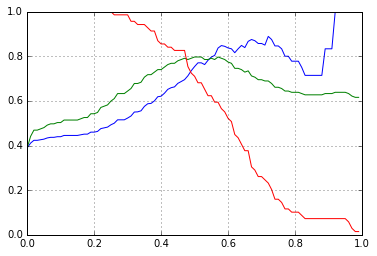

In [280]:
plt.plot(x_val,y_val_prec_yes,label='Prec')
plt.plot(x_val,y_val,label='Acc')
plt.plot(x_val,y_val_rec_yes,label='recall')
plt.grid(True)

In [292]:
y_val[45:60]

[0.77966101694915257,
 0.78531073446327682,
 0.79096045197740117,
 0.78531073446327682,
 0.79096045197740117,
 0.79661016949152541,
 0.79661016949152541,
 0.79661016949152541,
 0.78531073446327682,
 0.78531073446327682,
 0.79096045197740117,
 0.78531073446327682,
 0.79661016949152541,
 0.79096045197740117,
 0.78531073446327682]

<h1> New Start </h1>

In [14]:
dt_n = dt[(pd.isnull(dt.IsProd) == False) & (pd.isnull(dt.title) == False) & ( dt.top_GL != 'null')]

In [15]:
dt_n.columns

Index([u'documentId', u'title', u'p_cnt', u'az_link_cnt', u'other_link_cnt',
       u'comments_cnt', u'h1_cnt', u'h2_cnt', u'h3_cnt', u'h4_cnt', u'h5_cnt',
       u'h6_cnt', u'word_count_paragraphs', u'avg_word_count_paragraph',
       u'max_depth_dom', u'has_comments', u'protocol', u'sitename',
       u'top_levl_domain', u'domain', u'subdomain', u'ishomepage',
       u'no_url_params', u'no_url_levels', u'url_length',
       u'unique_candidate_keywords', u'kw_cnt_paragraphs', u'kw_cnt_title',
       u'kw_cnt_links', u'kw_cnt_az_links', u'kw_cnt_h1', u'kw_cnt_h2',
       u'kw_cnt_h3', u'kw_cnt_h4', u'kw_cnt_h5', u'kw_cnt_h6', u'max_kw_freq',
       u'mean_ngram_len', u'top_keyword', u'top_ASIN', u'top_GL',
       u'unique_keywords_cnt', u'asin_cnt', u'gl_cnt', u'top_3_keyword',
       u'top_3_asin', u'top_3_gl', u'top_3_keyword_score', u'top_3_asin_score',
       u'top_3_gl_score', u'is_topk_in_title', u'unique_keywords',
       u'top_kw_termfreq', u'top_kw_minlinenum', u'aksis_match_ra

In [47]:
vector_features = colname
traditional_features = ['p_cnt', 'az_link_cnt', 'other_link_cnt',
       'comments_cnt', 'h1_cnt', 'h2_cnt', 'h3_cnt', 'h4_cnt', 'h5_cnt',
       'h6_cnt', 'word_count_paragraphs', 'avg_word_count_paragraph',
       'max_depth_dom', 'has_comments','ishomepage',
       'no_url_params', 'no_url_levels', 'url_length',
       'unique_candidate_keywords', 'kw_cnt_paragraphs', 'kw_cnt_title',
       'kw_cnt_links', 'kw_cnt_az_links', 'kw_cnt_h1', 'kw_cnt_h2',
       'kw_cnt_h3', 'kw_cnt_h4', 'kw_cnt_h5', 'kw_cnt_h6', 'max_kw_freq',
       'mean_ngram_len', 'unique_keywords_cnt', 'asin_cnt', 'gl_cnt',  'is_topk_in_title', 'unique_keywords',
       'top_kw_termfreq', 'top_kw_minlinenum', 'aksis_match_rate',
       'max_kscore', 'range_top3_kscore', 'isHttp', 'best',
       'top', 'review']

In [31]:
v_t_features = traditional_features
for i in vector_features:
    v_t_features.append(i)

In [54]:
all_feat = dt_v1 = dt_v[(pd.isnull(dt_v.IsProd) == False) & (pd.isnull(dt_v.title) == False) & ( dt_v.top_GL != 'null') & (dt_v['v0'] != 0.0) & (dt_v['v1'] != 0.0) & (dt_v['v2'] != 0.0)]

In [55]:
all_feat.columns

Index([u'documentId', u'title', u'p_cnt', u'az_link_cnt', u'other_link_cnt',
       u'comments_cnt', u'h1_cnt', u'h2_cnt', u'h3_cnt', u'h4_cnt',
       ...
       u'v291', u'v292', u'v293', u'v294', u'v295', u'v296', u'v297', u'v298',
       u'v299', u'w2v_vocab_match'],
      dtype='object', length=368)

In [90]:
import cPickle as pickle
with open("all_training_objects", 'wb') as fp:
  pickle.dump([dt_kw_v1,dt_v1,dt,vector_features,traditional_features,v_t_features,all_feat], fp)
fp.close()

In [41]:
os.getcwd()

'C:\\Users\\badeepak'

In [44]:
len(all_feat)

875

In [45]:
all_feat = dt_v1 = dt_v[(pd.isnull(dt_v.IsProd) == False) & (pd.isnull(dt_v.title) == False) & ( dt_v.top_GL != 'null') & (dt_v['v0'] != 0.0) & (dt_v['v1'] != 0.0) & (dt_v['v2'] != 0.0)]

In [57]:
len(dt_v1)

875

In [58]:
len(dt_n)

906

In [73]:
dt_v[['title','w2v_vocab_match']].dropna()

,title,w2v_vocab_match
0,T.Face – FM Transmitter.ca,"['face', 'fm', 'transmitter', 'ca']"
1,Top 5 Best beer bottle cooler for sale 2016 : ...,"['top', 'best', 'beer', 'bottle', 'cooler', 's..."
2,I side 64% with Donald Trump,"['side', 'donald', 'trump']"
3,How to Spot Fake Ray-Bans | I Love Ray-Bans,"['spot', 'fake', 'ray', 'ban', 'love', 'ray', ..."
4,Beth's Beauties: Trendy Twine ~ Happy Birthday...,"['beth', 'beauty', 'trendy', 'twine', 'happy',..."
5,Review: Unigine's Valley benchmark gives you r...,"['review', 'valley', 'benchmark', 'give', 'roo..."
6,G925FXXU5DPL4 - Galaxy S6 edge SM-G925F DTM Ge...,"['g', 'galaxy', 'edge', 'sm', 'g', 'f', 'germa..."
7,Vinod Kumar Panikkath @panikkath Instagram pro...,"['vinod', 'kumar', 'profile']"
8,Lebron James Chosen To Be Featured On NBA 2K14...,"['lebron', 'james', 'chosen', 'featured', 'nba..."
9,"Elise Mostafa: Background Data, Facts, Social ...","['background', 'data', 'fact', 'social', 'medi..."


In [77]:
model['samsung']

array([ -9.71679688e-02,   2.28271484e-02,   1.64062500e-01,
         1.81640625e-01,  -1.39648438e-01,  -4.34570312e-02,
         3.71093750e-02,  -1.58203125e-01,   1.83593750e-01,
         1.44531250e-01,  -1.33789062e-01,   6.29882812e-02,
        -3.63281250e-01,  -3.14941406e-02,   1.12304688e-01,
         2.20703125e-01,   2.36328125e-01,   1.64062500e-01,
        -3.51562500e-02,  -1.70898438e-01,  -2.38281250e-01,
        -1.04003906e-01,   2.55859375e-01,  -8.20312500e-02,
        -2.14843750e-01,   1.59179688e-01,  -2.46093750e-01,
         2.61718750e-01,   2.83203125e-01,  -2.79296875e-01,
        -2.10937500e-01,   3.06640625e-01,  -8.05664062e-02,
        -1.48315430e-02,  -2.55859375e-01,  -2.64892578e-02,
        -2.12890625e-01,  -1.41601562e-02,   2.40234375e-01,
         1.06933594e-01,  -1.80664062e-02,  -1.51367188e-01,
         1.34765625e-01,   2.14843750e-01,   2.53906250e-01,
        -1.23291016e-02,   6.34765625e-02,  -2.19726562e-01,
        -5.85937500e-02,

<h3> lets try word vectors on keywords instead of title </h3>

In [79]:
dt_vectors = []
dt_w2v_vocab = []
dummy = [0.00] * 300
for i in dt['top_3_keyword'].fillna(''):
    doc = [word for word in process(i) if word in model.vocab]
    if len(set(doc)) == 0:
        dt_vectors.append(dummy)
        dt_w2v_vocab.append([])
    else:
        dt_vectors.append(np.mean(model[doc],axis=0))         
        dt_w2v_vocab.append([word for word in process(i) if word in model.vocab])

In [85]:
colname = ["v_kw_"+str(i) for i in range(0,300)]
dt_vec = pd.DataFrame(dt_vectors,columns = colname)
dt_vec1 = pd.DataFrame([str(i) for i in dt_w2v_vocab],columns = ['w2v_kw_vocab_match'])
dt_kw_v = dt.join(dt_vec)
dt_kw_v = dt_kw_v.join(dt_vec1)
dt_kw_v1 = dt_kw_v[(pd.isnull(dt_v.IsProd) == False) & (pd.isnull(dt_v.title) == False) & ( dt_v.top_GL != 'null') & (dt_v['v0'] != 0.0) & (dt_v['v1'] != 0.0) & (dt_v['v2'] != 0.0)]

In [86]:
colname = ["v_"+str(i) for i in range(0,300)]

In [30]:
len(dt)

948